In [452]:
# import the packages that we'll need

import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.widgets as mwidgets
%matplotlib inline
sns.set_style(style='white')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from scipy import stats

In [453]:
rat_df = pd.read_csv('/Users/rmtaylor/ML/Projects/rat/Metabolites.csv')

In [454]:
rat_df.head()

,Species,Strain,ID,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Sex,...,HCO3- _mM,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat
0,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0
1,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN
4,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [455]:
rat_df.columns

Index(['Species', 'Strain', 'ID', 'Shaved', 'Fasted', 'Hydration',
       'STZ Injected', 'Weight_gms', 'Age_wks', 'Sex', 'Hours_Isoflurane',
       'Blood_Glu', 'Blood_Lac', 'Blood_Ket', 'ISF_Glu', 'ISF_Lac', 'ISF_Ket',
       'BI_Glu_Ratio', 'BI_Lac_Ratio', 'BI_Ket_Ratio', 'Prototype',
       'ExtractionTime_min', 'TotalISF_uL', 'ExtractionRate_uL/min', 'pH',
       'pCO2 _mm Hg', 'pO2_mm Hg', 'SO2_%', 'Hct _%', 'tHb_g/dL', 'Na _mM',
       'K _mM', 'Cl _mM', 'iCa _mM', 'iMg_mM', 'Glu _mg/dL', 'Lac_mM',
       'Creat_mg/dL', 'BUN_mg/dL', 'O2Hb_%', 'COHb_%', 'MetHb_%', 'Hhb_%',
       'tBil_mg/dL', 'HbF_%', 'TCO2_mM', 'BE-ecf_mM', 'BE-b_mM', 'SBC_mM',
       'HCO3- _mM', 'O2Cap_mL/dL', 'O2Ct_mL/dL', 'P50_mm Hg', 'pO2/FlO2_mm Hg',
       'nCa_mM', 'nMg_mM', 'Gap(K)_mM', 'nCa/nMg', 'BUN/Creat'],
      dtype='object')

In [456]:
#Find out how many rows and columns are now in the dataframe

print ('Number of rows and columns in dataframe', rat_df.shape)

Number of rows and columns in dataframe (217, 59)


In [457]:
#Look at some basic statistics about the data

rat_df.describe()

,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Hours_Isoflurane,Blood_Glu,Blood_Lac,Blood_Ket,...,HCO3- _mM,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat
count,217.000000,217.000000,217.000000,217.000000,132.000000,124.000000,203.000000,200.000000,102.000000,172.000000,...,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.0,3.000000
mean,0.101382,0.179724,0.096774,0.188940,304.357576,13.919355,0.901330,283.400000,4.831373,0.173256,...,28.15000,23.950000,15.466667,29.300000,499.650000,1.110000,10.017500,15.800000,2.1,30.500000
std,0.439747,0.384845,0.296334,0.392366,79.823917,13.471649,0.552175,113.317405,4.776676,0.469770,...,4.17193,1.202082,9.962597,0.989949,32.456201,0.070711,16.734918,0.141421,0.0,23.859799
min,0.000000,0.000000,0.000000,0.000000,128.000000,5.000000,0.050000,78.000000,1.100000,0.000000,...,25.20000,23.100000,4.000000,28.600000,476.700000,1.060000,0.510000,15.700000,2.1,3.000000
25%,0.000000,0.000000,0.000000,0.000000,249.000000,5.000000,0.420000,189.750000,2.300000,0.000000,...,26.67500,23.525000,12.200000,28.950000,488.175000,1.085000,0.547500,15.750000,2.1,22.900000
50%,0.000000,0.000000,0.000000,0.000000,271.000000,6.500000,0.870000,281.500000,2.900000,0.000000,...,28.15000,23.950000,20.400000,29.300000,499.650000,1.110000,2.280000,15.800000,2.1,42.800000
75%,0.000000,0.000000,0.000000,0.000000,367.000000,21.000000,1.320000,354.250000,5.050000,0.200000,...,29.62500,24.375000,21.200000,29.650000,511.125000,1.135000,11.750000,15.850000,2.1,44.250000
max,2.000000,1.000000,1.000000,1.000000,449.000000,44.000000,2.080000,571.000000,18.800000,2.500000,...,31.10000,24.800000,22.000000,30.000000,522.600000,1.160000,35.000000,15.900000,2.1,45.700000


In [458]:
#What are the different unique rats used and how many rows of data do we have for each?

rat_df['ID'].value_counts()

A1_38555          27
A2_33134          24
A3_38555          24
S1_38789          19
190807            17
180626_3          16
180822_17.25hr    12
180628            12
180822_19hr       11
190802            11
180914_0hr         9
180905_17.5        8
180914_14hr        8
180807_G           6
38556_C1           4
39624_S2           3
39624_S4           3
39624_S3           2
38788_B1           1
Name: ID, dtype: int64

## Exploratory Data Analysis (EDA)

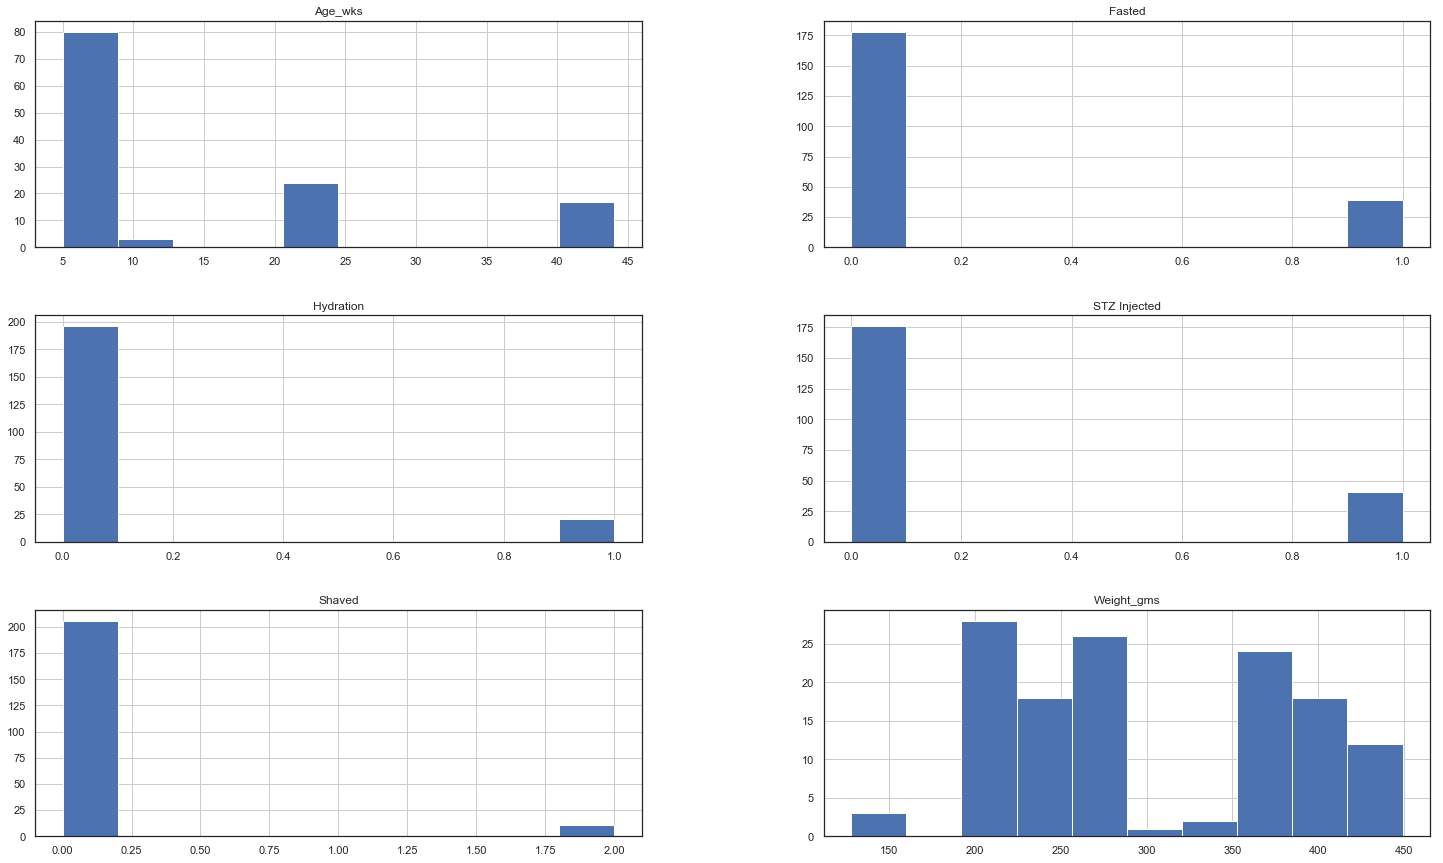

In [459]:
#Let's first look at the counts for each feature

fig = rat_df[['ID','Fasted','Hydration','STZ Injected', 'Weight_gms','Sex', 'Age_wks', 'Shaved']]
fig.hist(figsize = (25,15))
plt.show()

In [460]:
#... and let's look at the counts of the different ages, fasting, hydration, etc...

rat_df['Age_wks'].value_counts()

5.0     54
21.0    24
6.5     18
44.0    17
7.0      5
6.0      3
12.0     2
10.0     1
Name: Age_wks, dtype: int64

In [461]:
rat_df['Fasted'].value_counts()

0    178
1     39
Name: Fasted, dtype: int64

In [462]:
rat_df['Hydration'].value_counts()

0    196
1     21
Name: Hydration, dtype: int64

In [463]:
rat_df['STZ Injected'].value_counts()

0    176
1     41
Name: STZ Injected, dtype: int64

In [464]:
rat_df['Weight_gms'].value_counts()

217.0    27
271.0    24
367.0    24
249.0    18
404.0    17
425.0    11
128.0     2
332.2     1
449.0     1
398.0     1
266.0     1
288.0     1
219.0     1
158.0     1
289.0     1
324.0     1
Name: Weight_gms, dtype: int64

In [465]:
rat_df['Shaved'].value_counts()

0    206
2     11
Name: Shaved, dtype: int64

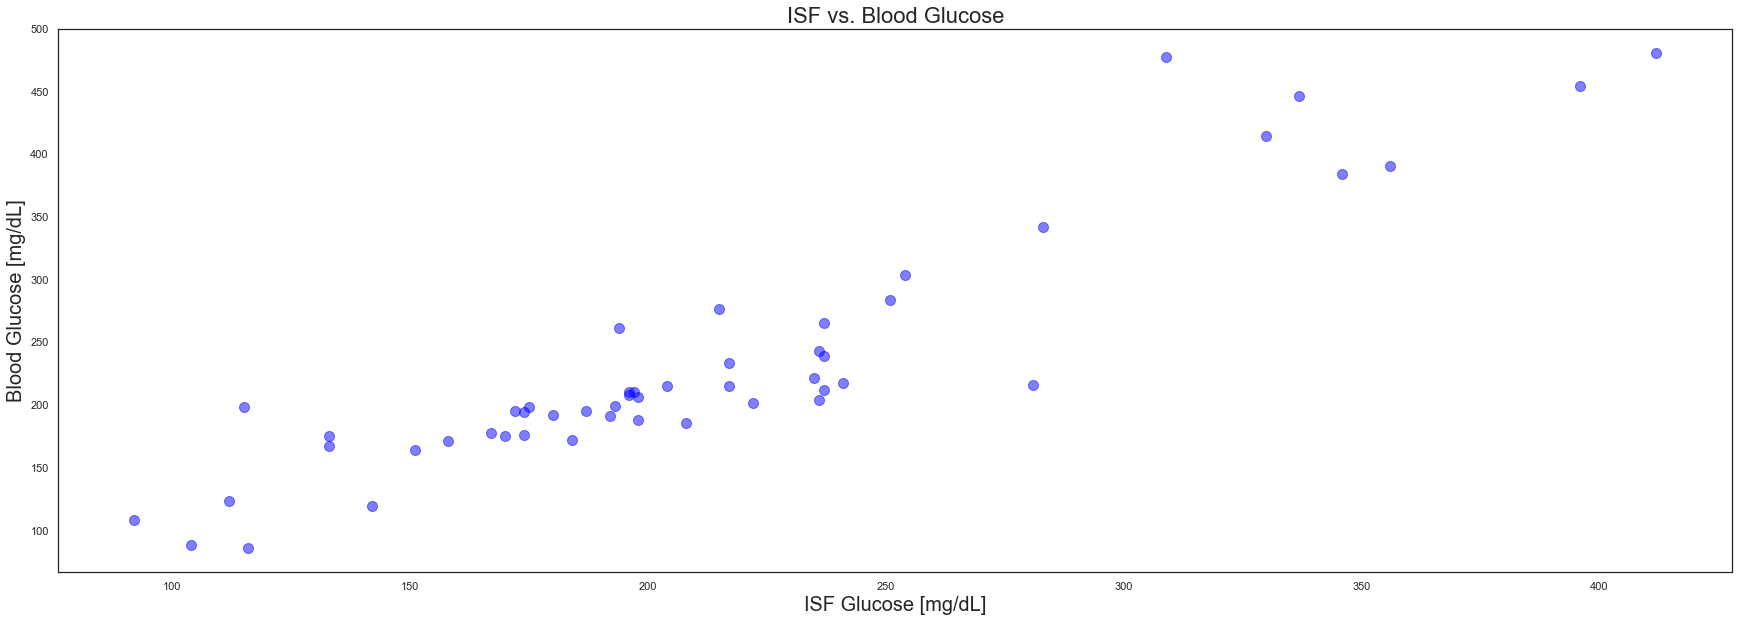

In [466]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.ISF_Glu, rat_df.Blood_Glu, s=100, alpha=0.5, color='blue')
plt.xlabel("ISF Glucose [mg/dL]", fontsize = 20)
plt.ylabel("Blood Glucose [mg/dL]", fontsize = 20)
plt.title("ISF vs. Blood Glucose", fontsize = 22)
plt.show()

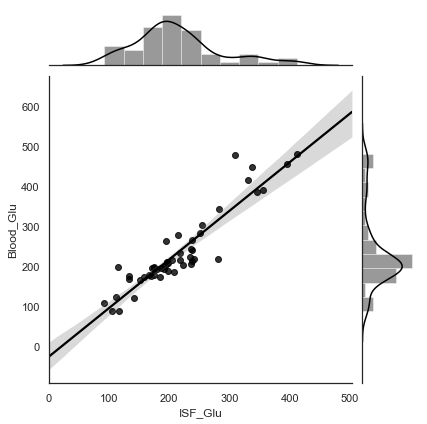

In [467]:
sns.jointplot(x=rat_df.ISF_Glu, y=rat_df.Blood_Glu, kind="reg", color='black')

In [468]:
Glu_df = rat_df[['Blood_Glu', 'ISF_Glu']]
Glu_df.shape

(217, 2)

In [469]:
Glu_df = Glu_df.dropna()

In [470]:
Glu_df.head()

,Blood_Glu,ISF_Glu
143,175.0,133.0
145,206.0,198.0
146,185.0,208.0
147,208.0,196.0
148,195.0,187.0


In [471]:
Glu_df.shape

(51, 2)

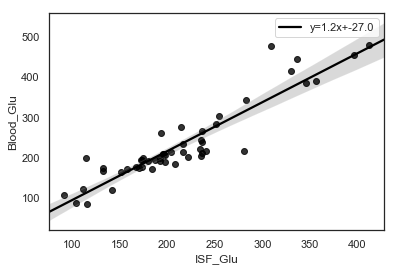

In [472]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(Glu_df['ISF_Glu'],Glu_df['Blood_Glu'])

ax = ax = sns.regplot(x="ISF_Glu", y="Blood_Glu", data=Glu_df, color='black', 
                  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

In [473]:
Ket_df = rat_df[['Blood_Ket', 'ISF_Ket']]
Ket_df.shape

(217, 2)

In [474]:
Ket_df = Ket_df.dropna()
Ket_df.shape

(95, 2)

In [475]:
Ket_df.head()

,Blood_Ket,ISF_Ket
95,0.0,0.9
96,0.0,0.5
97,0.0,0.4
98,0.0,0.6
99,0.0,0.3


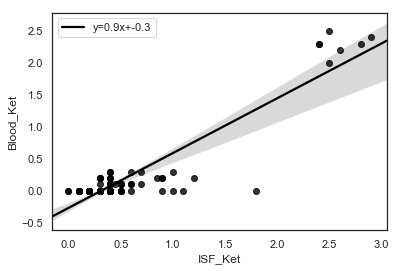

In [476]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(Ket_df['ISF_Ket'],Ket_df['Blood_Ket'])

ax = ax = sns.regplot(x="ISF_Ket", y="Blood_Ket", data=Ket_df, color='black', 
                  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

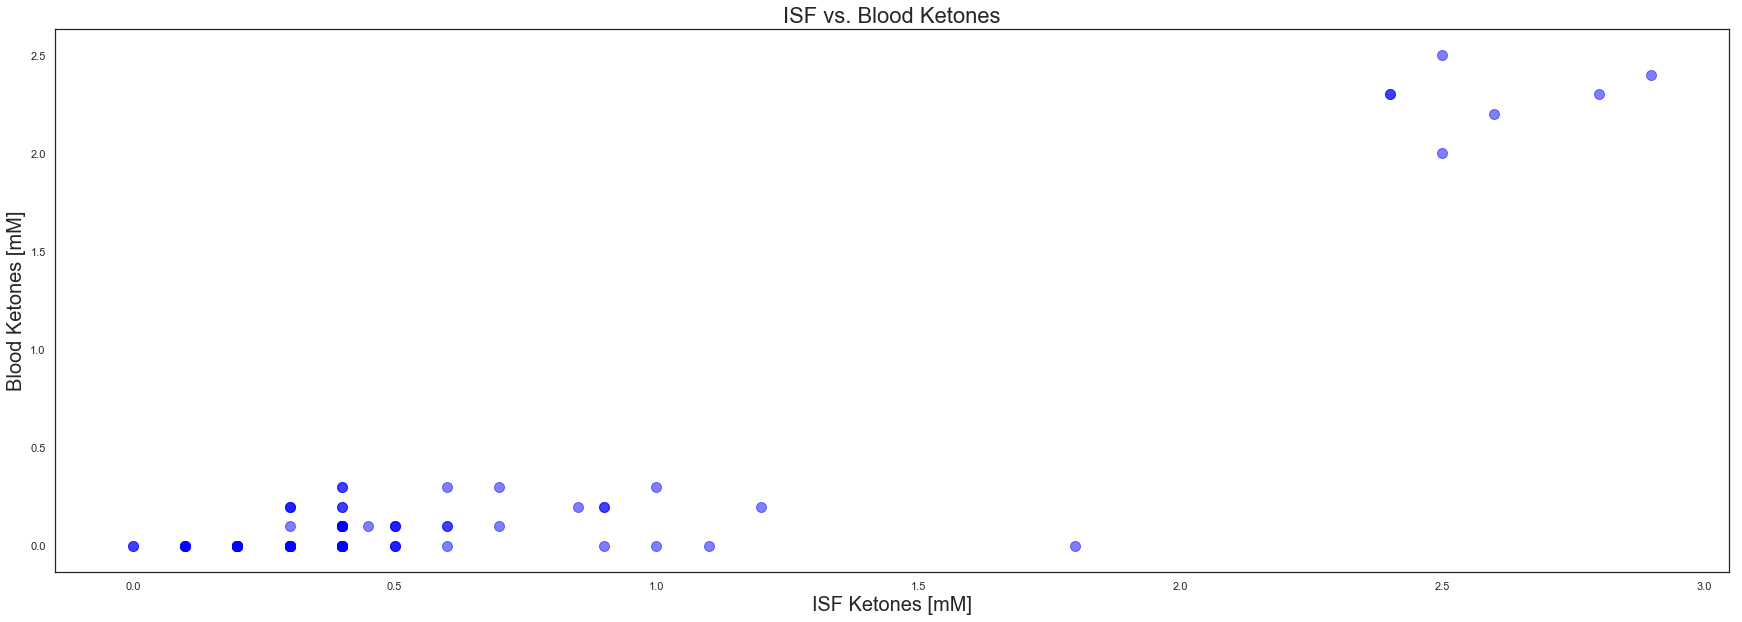

In [477]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.ISF_Ket, rat_df.Blood_Ket, s=100, alpha=0.5, color='blue')
plt.xlabel("ISF Ketones [mM]", fontsize = 20)
plt.ylabel("Blood Ketones [mM]", fontsize = 20)
plt.title("ISF vs. Blood Ketones", fontsize = 22)
plt.show()

In [478]:
Lac_df = rat_df[['Blood_Lac', 'ISF_Lac']]
Lac_df.shape

(217, 2)

In [479]:
Lac_df = Lac_df.dropna()
Lac_df.shape

(0, 2)

In [480]:
female_df = rat_df[rat_df['Sex']== 'F']
female_df.shape

(103, 59)

In [481]:
male_df = rat_df[rat_df['Sex']== 'M']
male_df.shape

(32, 59)

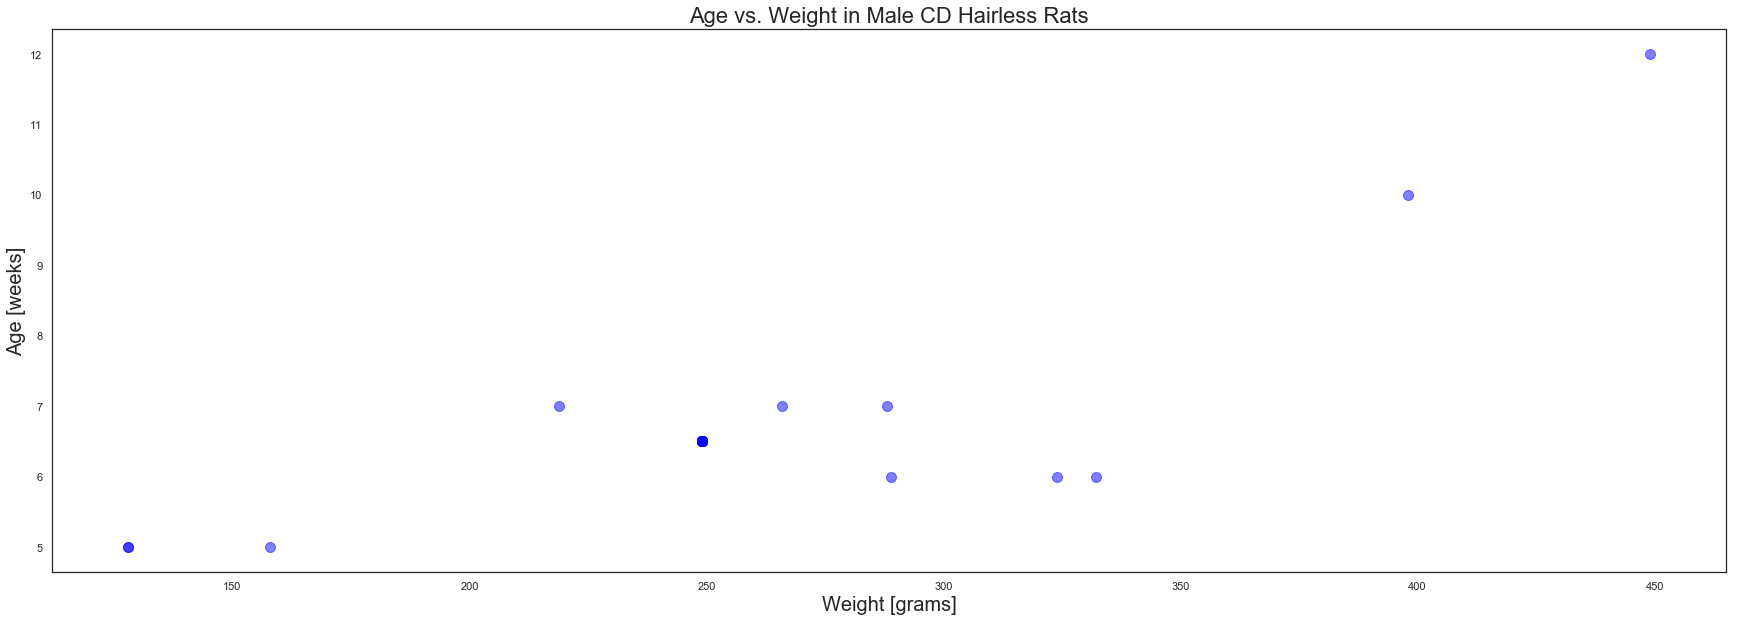

In [482]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(male_df.Weight_gms, male_df.Age_wks, s=100, alpha=0.5, color='blue')
plt.xlabel("Weight [grams]", fontsize = 20)
plt.ylabel("Age [weeks]", fontsize = 20)
plt.title("Age vs. Weight in Male CD Hairless Rats", fontsize = 22)
plt.show()

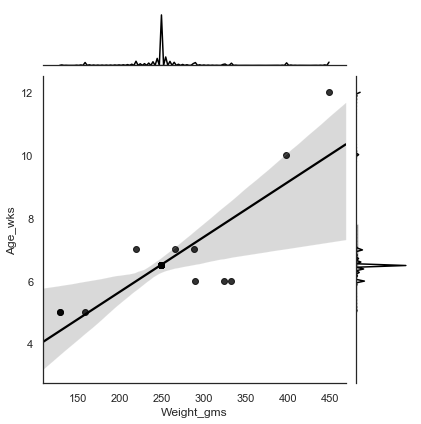

In [483]:
sns.jointplot(x=male_df.Weight_gms, y=male_df.Age_wks, kind="reg", color='black')

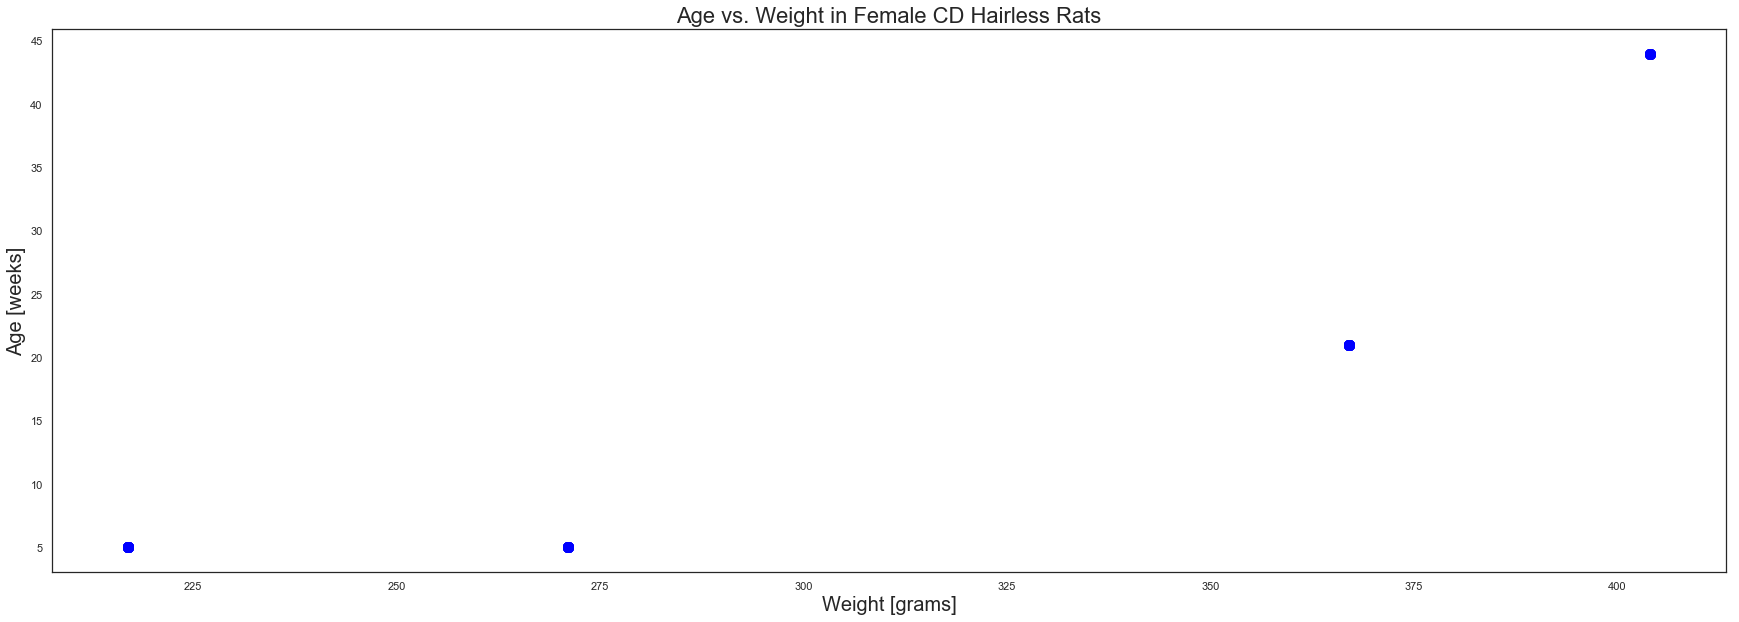

In [484]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(female_df.Weight_gms, female_df.Age_wks, s=100, alpha=0.5, color='blue')
plt.xlabel("Weight [grams]", fontsize = 20)
plt.ylabel("Age [weeks]", fontsize = 20)
plt.title("Age vs. Weight in Female CD Hairless Rats", fontsize = 22)
plt.show()

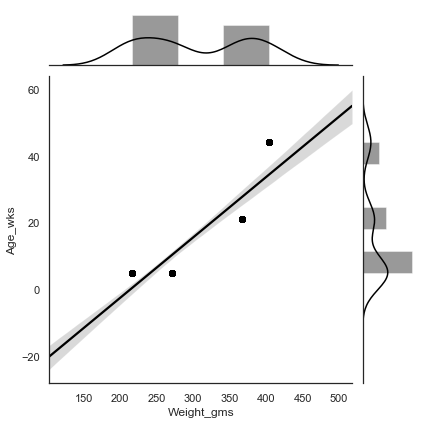

In [485]:
sns.jointplot(x=female_df.Weight_gms, y=female_df.Age_wks, kind="reg", color='black')

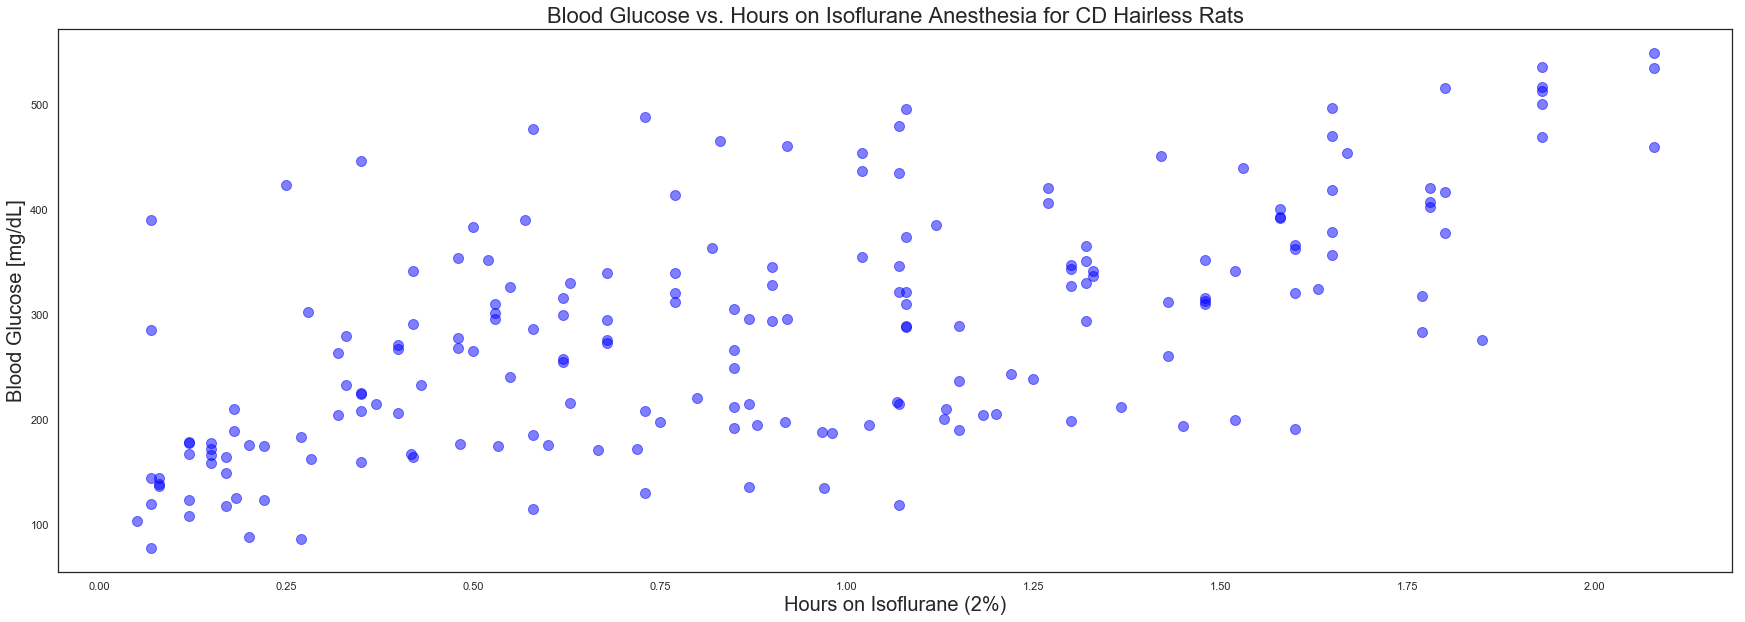

In [486]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.Hours_Isoflurane, rat_df.Blood_Glu, s=100, alpha=0.5, color='blue')
plt.xlabel("Hours on Isoflurane (2%)", fontsize = 20)
plt.ylabel("Blood Glucose [mg/dL]", fontsize = 20)
plt.title("Blood Glucose vs. Hours on Isoflurane Anesthesia for CD Hairless Rats", fontsize = 22)
plt.show()

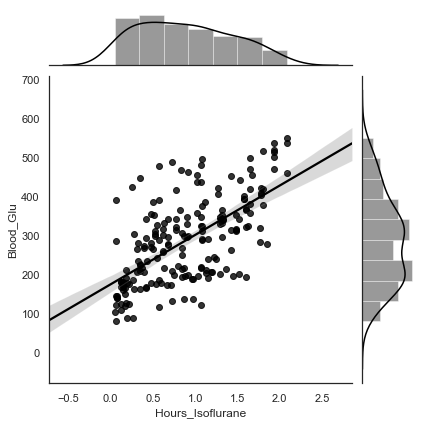

In [487]:
sns.jointplot(x=rat_df.Hours_Isoflurane, y=rat_df.Blood_Glu, kind="reg", color='black')

In [488]:
# Correlation between 
rat_df[["Strain", "BI_Glu_Ratio", "BI_Ket_Ratio"]].groupby(["Strain"], as_index=False).mean().sort_values(by="BI_Glu_Ratio", ascending=False)

,Strain,BI_Glu_Ratio,BI_Ket_Ratio
0,CD Hairless,1.091111,0.181264
1,Sprague Dawley,0.990000,0.195000


In [489]:
# Correlation between 
rat_df[["ID", "BI_Glu_Ratio", "BI_Ket_Ratio"]].groupby(["ID"], as_index=False).mean().sort_values(by="BI_Glu_Ratio", ascending=False)

,ID,BI_Glu_Ratio,BI_Ket_Ratio
7,180914_14hr,1.430000,0.000000
6,180914_0hr,1.156250,0.000000
4,180822_19hr,1.120000,0.246000
9,190807,1.074615,0.272667
3,180822_17.25hr,1.043333,0.300000
8,190802,0.990000,0.195000
5,180905_17.5,0.810000,0.888571
0,180626_3,NaN,0.000000
1,180628,NaN,0.000000
2,180807_G,NaN,0.000000


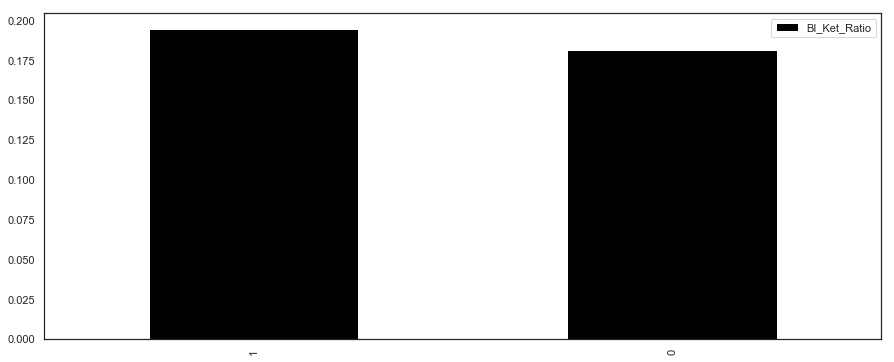

In [490]:
rat_df[["Strain", "BI_Ket_Ratio"]].groupby(["Strain"], 
                                                           as_index=False).mean().sort_values(by="BI_Ket_Ratio", ascending=False).plot(kind='bar', 
                                                                                                                                       grid=False, 
                                                                                                                                       figsize = (15,6), 
                                                                                                                                       color = 'black')
plt.show()

In [491]:
# Correlation between 
rat_df[["Strain", "Blood_Glu", "ISF_Glu"]].groupby(["Strain"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Strain,Blood_Glu,ISF_Glu
0,CD Hairless,287.253968,212.022222
1,Sprague Dawley,217.181818,226.500000


In [492]:
# Correlation between 
rat_df[["Strain", "ExtractionRate_uL/min"]].groupby(["Strain"], as_index=False).mean().sort_values(by="ExtractionRate_uL/min", ascending=False)

,Strain,ExtractionRate_uL/min
0,CD Hairless,0.917221
1,Sprague Dawley,0.841000


In [493]:
# Correlation between 
rat_df[["Strain", "Blood_Ket", "ISF_Ket", "STZ Injected"]].groupby(["STZ Injected", "Strain"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,STZ Injected,Strain,Blood_Ket,ISF_Ket
0,0,CD Hairless,0.202344,0.645205
2,1,CD Hairless,0.094118,0.331250
1,0,Sprague Dawley,0.070000,0.316667


In [494]:
# Correlation between 
rat_df[["Strain", "Blood_Glu", "ISF_Glu", "STZ Injected", "Hydration", "Fasted"]].groupby(["STZ Injected", "Hydration", "Fasted", "Strain"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,STZ Injected,Hydration,Fasted,Strain,Blood_Glu,ISF_Glu
5,1,0,1,CD Hairless,456.000000,323.000000
4,1,0,0,CD Hairless,333.500000,321.750000
0,0,0,0,CD Hairless,307.566667,187.461538
6,1,1,0,CD Hairless,255.588235,NaN
1,0,0,0,Sprague Dawley,217.181818,226.500000
2,0,0,1,CD Hairless,169.129032,176.545455
3,0,1,0,CD Hairless,145.000000,NaN


In [495]:
# Correlation between 
rat_df[["Strain", "Blood_Ket", "ISF_Ket", "STZ Injected", "Hydration", "Fasted"]].groupby(["STZ Injected", "Hydration", "Fasted", "Strain"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,STZ Injected,Hydration,Fasted,Strain,Blood_Ket,ISF_Ket
2,0,0,1,CD Hairless,0.696774,1.100000
6,1,1,0,CD Hairless,0.228571,NaN
1,0,0,0,Sprague Dawley,0.070000,0.316667
0,0,0,0,CD Hairless,0.044792,0.378261
3,0,1,0,CD Hairless,0.000000,NaN
4,1,0,0,CD Hairless,0.000000,0.362500
5,1,0,1,CD Hairless,0.000000,0.300000


# Glucose EDA

In [496]:
# Correlation between 
rat_df[["Hydration", "Blood_Glu", "ISF_Glu"]].groupby(["Hydration"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Hydration,Blood_Glu,ISF_Glu
0,0,286.758242,213.72549
1,1,249.444444,NaN


In [497]:
# Correlation between 
rat_df[["Fasted", "Blood_Glu", "ISF_Glu"]].groupby(["Fasted"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Fasted,Blood_Glu,ISF_Glu
0,0,296.826087,235.925926
1,1,227.974359,188.750000


In [498]:
# Correlation between 
rat_df[["Sex", "Blood_Glu", "ISF_Glu"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Sex,Blood_Glu,ISF_Glu
0,F,295.260417,199.789474
1,M,250.272727,NaN


In [499]:
# Correlation between 
rat_df[["STZ Injected", "Blood_Glu", "ISF_Glu"]].groupby(["STZ Injected"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,STZ Injected,Blood_Glu,ISF_Glu
1,1,324.189189,322.000000
0,0,274.141104,187.317073


In [500]:
# Correlation between 
rat_df[["Age_wks", "Blood_Glu", "ISF_Glu"]].groupby(["Age_wks"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Age_wks,Blood_Glu,ISF_Glu
6,21.0,362.136364,NaN
0,5.0,321.695652,NaN
2,6.5,269.200000,NaN
3,7.0,237.600000,NaN
7,44.0,187.705882,187.461538
5,12.0,140.000000,NaN
1,6.0,NaN,NaN
4,10.0,NaN,NaN


In [501]:
# Correlation between 
rat_df[["Weight_gms", "Blood_Glu", "ISF_Glu"]].groupby(["Weight_gms"], as_index=False).mean().sort_values(by="Blood_Glu", ascending=False)

,Weight_gms,Blood_Glu,ISF_Glu
3,219.0,571.000000,NaN
11,367.0,362.136364,NaN
6,271.0,341.789474,NaN
2,217.0,307.555556,NaN
4,249.0,269.200000,NaN
14,425.0,217.181818,226.500000
13,404.0,187.705882,187.461538
7,288.0,160.000000,NaN
5,266.0,150.000000,NaN
15,449.0,135.000000,NaN


# Ketone EDA

In [502]:
# Correlation between 
rat_df[["Hydration", "Blood_Ket", "ISF_Ket"]].groupby(["Hydration"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Hydration,Blood_Ket,ISF_Ket
1,1,0.213333,NaN
0,0,0.169427,0.571579


In [503]:
# Correlation between 
rat_df[["Fasted", "Blood_Ket", "ISF_Ket"]].groupby(["Fasted"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Fasted,Blood_Ket,ISF_Ket
1,1,0.553846,0.917143
0,0,0.061654,0.370000


In [504]:
# Correlation between 
rat_df[["Sex", "Blood_Ket", "ISF_Ket"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Sex,Blood_Ket,ISF_Ket
1,M,0.168421,NaN
0,F,0.070423,0.385714


In [505]:
# Correlation between 
rat_df[["STZ Injected", "Blood_Ket", "ISF_Ket"]].groupby(["STZ Injected"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,STZ Injected,Blood_Ket,ISF_Ket
0,0,0.192754,0.620253
1,1,0.094118,0.331250


In [506]:
# Correlation between 
rat_df[["Age_wks", "Blood_Ket", "ISF_Ket"]].groupby(["Age_wks"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Age_wks,Blood_Ket,ISF_Ket
2,6.5,0.200000,NaN
3,7.0,0.160000,NaN
0,5.0,0.128571,NaN
7,44.0,0.100000,0.413333
5,12.0,0.000000,NaN
6,21.0,0.000000,NaN
1,6.0,NaN,NaN
4,10.0,NaN,NaN


In [507]:
# Correlation between 
rat_df[["Weight_gms", "Blood_Ket", "ISF_Ket"]].groupby(["Weight_gms"], as_index=False).mean().sort_values(by="Blood_Ket", ascending=False)

,Weight_gms,Blood_Ket,ISF_Ket
2,217.0,0.207692,NaN
4,249.0,0.200000,NaN
13,404.0,0.100000,0.413333
14,425.0,0.070000,0.316667
3,219.0,0.000000,NaN
5,266.0,0.000000,NaN
6,271.0,0.000000,NaN
7,288.0,0.000000,NaN
11,367.0,0.000000,NaN
15,449.0,0.000000,NaN


# Lactate EDA

In [508]:
# Correlation between 
rat_df[["Hydration", "Blood_Lac", "ISF_Lac"]].groupby(["Hydration"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Hydration,Blood_Lac,ISF_Lac
1,1,13.882353,NaN
0,0,3.021176,NaN


In [509]:
# Correlation between 
rat_df[["Fasted", "Blood_Lac", "ISF_Lac"]].groupby(["Fasted"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Fasted,Blood_Lac,ISF_Lac
0,0,4.831373,NaN
1,1,NaN,NaN


In [510]:
# Correlation between 
rat_df[["Sex", "Blood_Lac", "ISF_Lac"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Sex,Blood_Lac,ISF_Lac
1,M,11.600000,NaN
0,F,3.110769,NaN


In [511]:
# Correlation between 
rat_df[["STZ Injected", "Blood_Lac", "ISF_Lac"]].groupby(["STZ Injected"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,STZ Injected,Blood_Lac,ISF_Lac
1,1,12.678947,NaN
0,0,3.034940,NaN


In [512]:
# Correlation between 
rat_df[["Age_wks", "Blood_Lac", "ISF_Lac"]].groupby(["Age_wks"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Age_wks,Blood_Lac,ISF_Lac
2,6.5,15.378571,NaN
3,7.0,5.120000,NaN
6,21.0,3.975000,NaN
0,5.0,2.726667,NaN
5,12.0,1.350000,NaN
1,6.0,NaN,NaN
4,10.0,NaN,NaN
7,44.0,NaN,NaN


In [513]:
# Correlation between 
rat_df[["Weight_gms", "Blood_Lac", "ISF_Lac"]].groupby(["Weight_gms"], as_index=False).mean().sort_values(by="Blood_Lac", ascending=False)

,Weight_gms,Blood_Lac,ISF_Lac
4,249.0,15.378571,NaN
6,271.0,4.111111,NaN
11,367.0,3.975000,NaN
3,219.0,2.900000,NaN
2,217.0,1.803704,NaN
5,266.0,1.700000,NaN
7,288.0,1.600000,NaN
15,449.0,1.400000,NaN
0,128.0,NaN,NaN
1,158.0,NaN,NaN


In [514]:
novaprime_df = rat_df.dropna(subset=['pH'])

In [515]:
novaprime_df.shape

(2, 59)

# NovaPrime Results

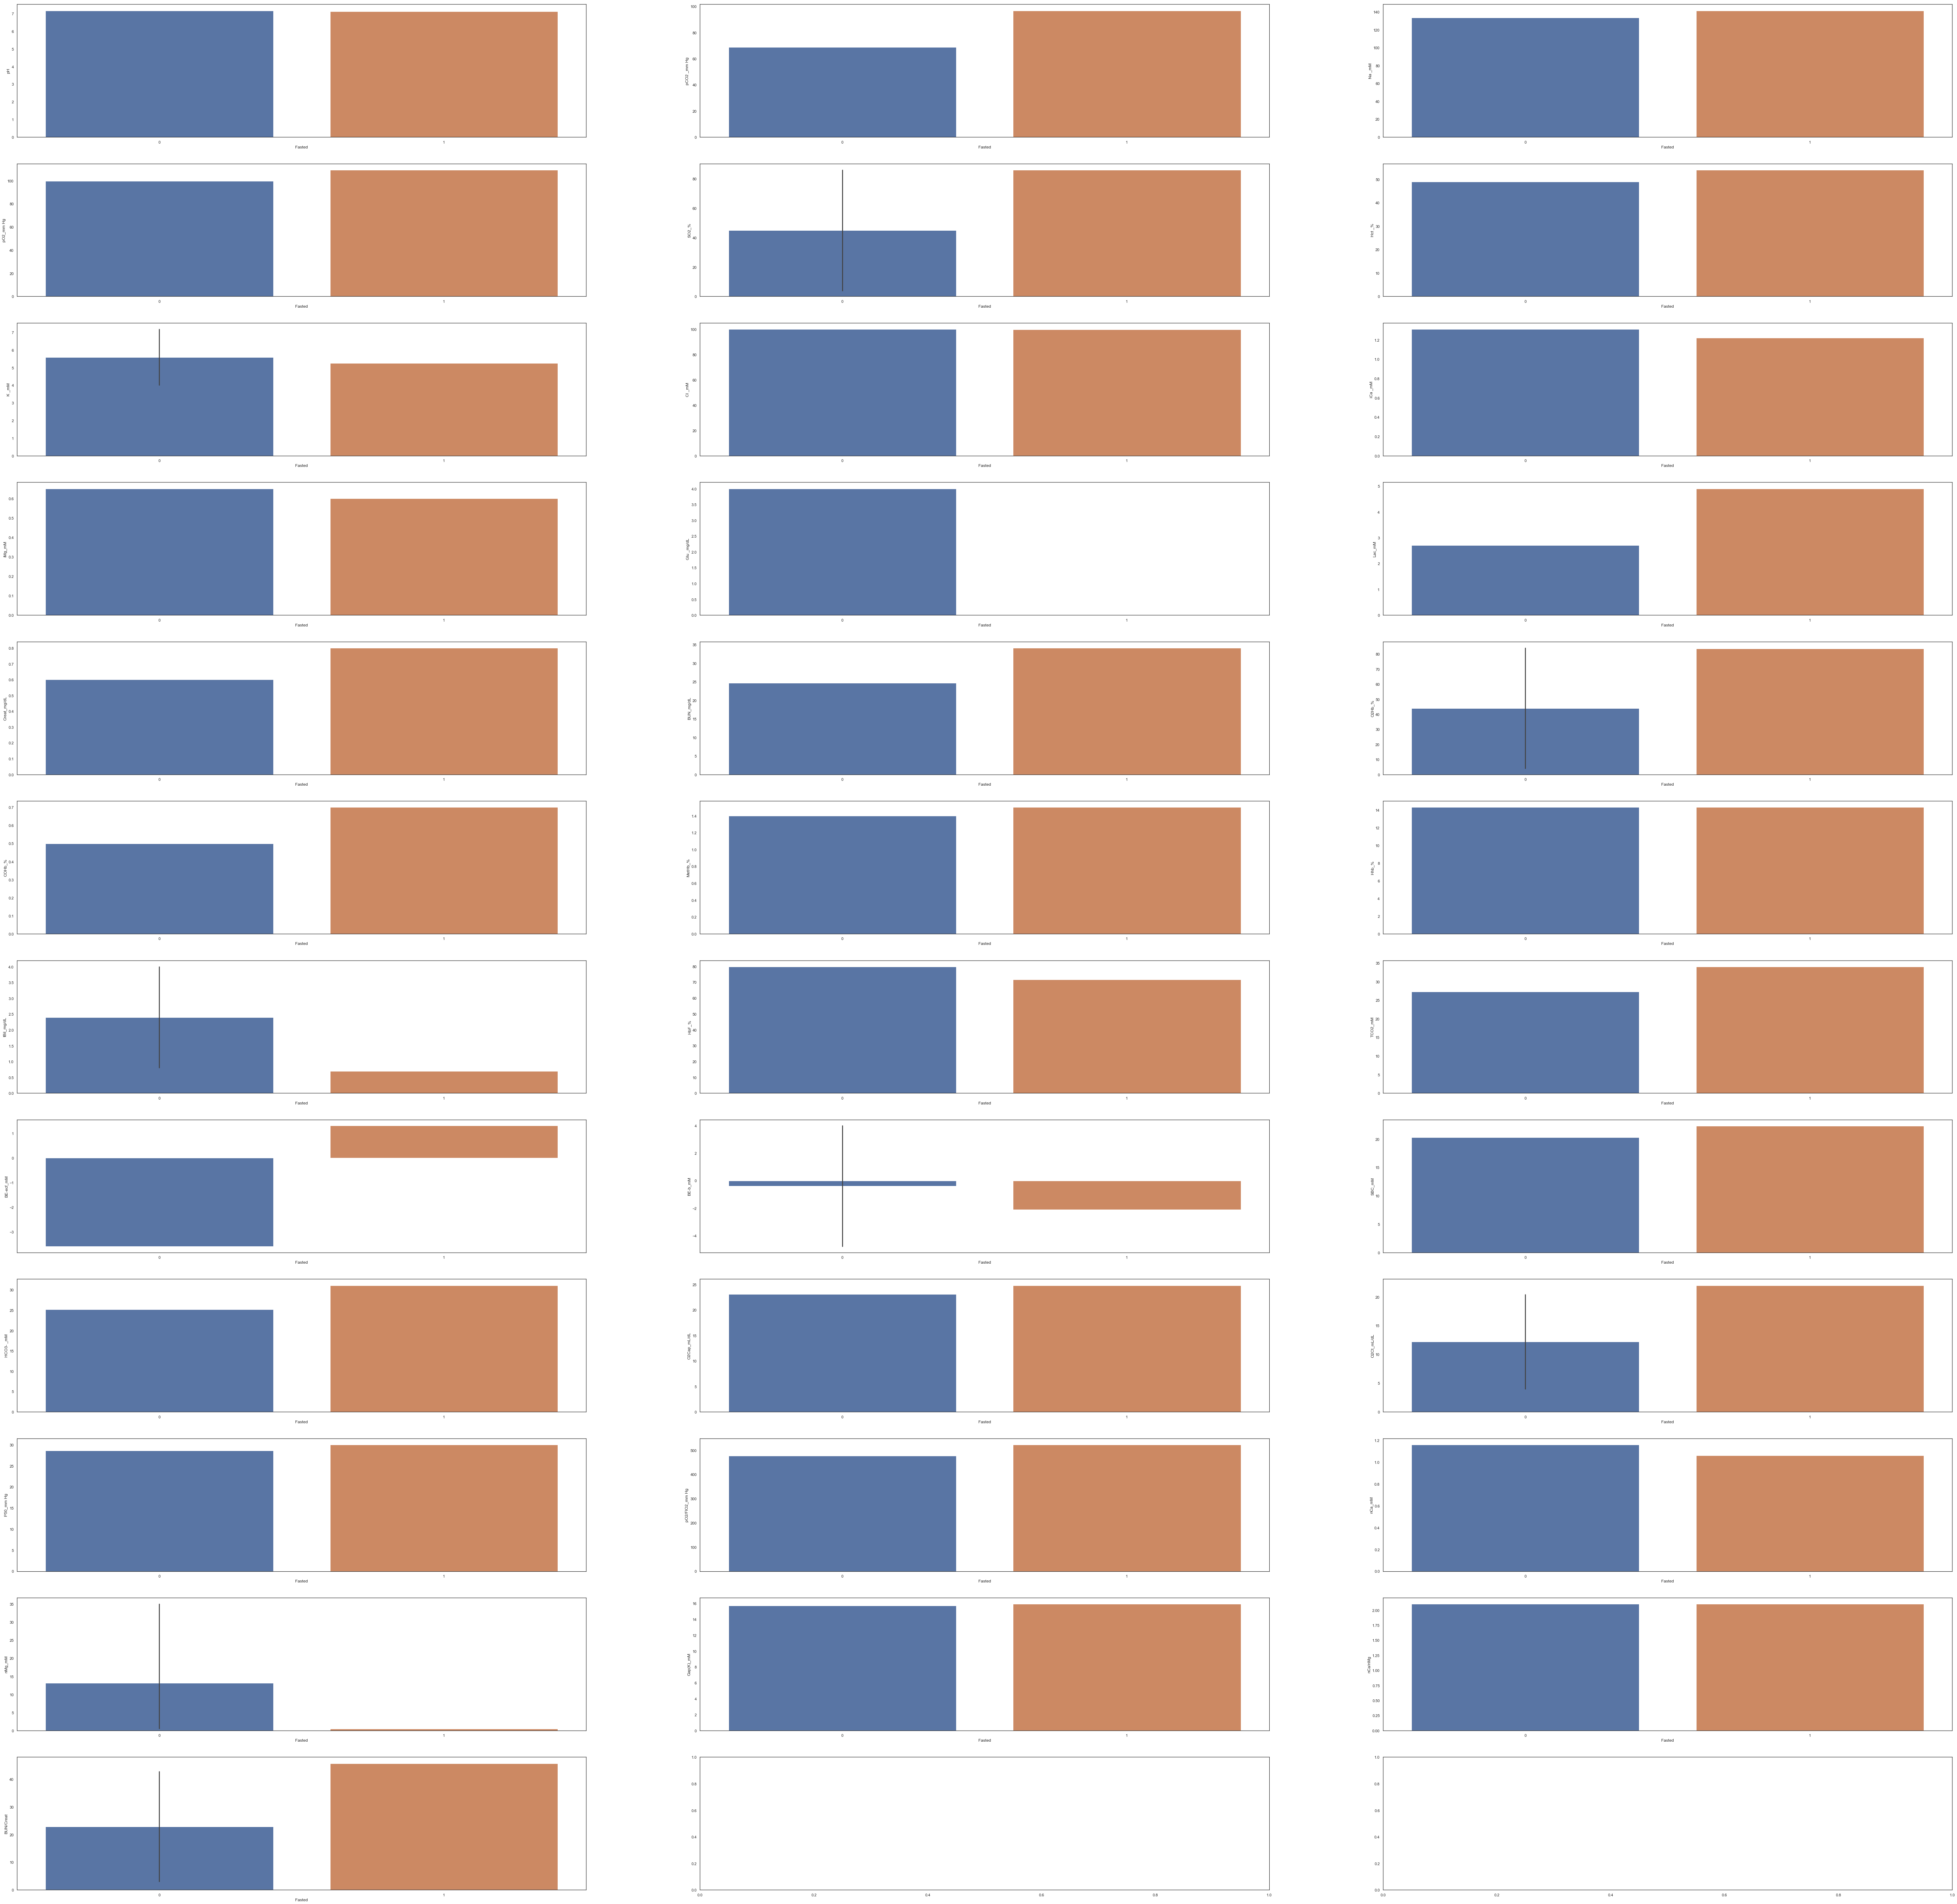

In [516]:
fig, axes =plt.subplots(12,3, figsize=(100, 100))
sns.barplot(  y="pH", x= "Fasted", data=rat_df, ax=axes[0,0])
sns.barplot(  y="pCO2 _mm Hg", x= "Fasted", data=rat_df, ax=axes[0,1])
sns.barplot(  y="Na _mM", x= "Fasted", data=rat_df, ax=axes[0,2])
sns.barplot(  y="pO2_mm Hg", x= "Fasted", data=rat_df, ax=axes[1,0])
sns.barplot(  y="SO2_%", x= "Fasted", data=rat_df, ax=axes[1,1])
sns.barplot(  y="Hct _%", x= "Fasted", data=rat_df, ax=axes[1,2])
sns.barplot(  y="K _mM", x= "Fasted", data=rat_df, ax=axes[2,0])
sns.barplot(  y="Cl _mM", x= "Fasted", data=rat_df, ax=axes[2,1])
sns.barplot(  y="iCa _mM", x= "Fasted", data=rat_df, ax=axes[2,2])
sns.barplot(  y="iMg_mM", x= "Fasted", data=rat_df, ax=axes[3,0])
sns.barplot(  y="Glu _mg/dL", x= "Fasted", data=rat_df, ax=axes[3,1])
sns.barplot(  y="Lac_mM", x= "Fasted", data=rat_df, ax=axes[3,2])
sns.barplot(  y="Creat_mg/dL", x= "Fasted", data=rat_df, ax=axes[4,0])
sns.barplot(  y="BUN_mg/dL", x= "Fasted", data=rat_df, ax=axes[4,1])
sns.barplot(  y="O2Hb_%", x= "Fasted", data=rat_df, ax=axes[4,2])
sns.barplot(  y="COHb_%", x= "Fasted", data=rat_df, ax=axes[5,0])
sns.barplot(  y="MetHb_%", x= "Fasted", data=rat_df, ax=axes[5,1])
sns.barplot(  y="Hhb_%", x= "Fasted", data=rat_df, ax=axes[5,2])
sns.barplot(  y="tBil_mg/dL", x= "Fasted", data=rat_df, ax=axes[6,0])
sns.barplot(  y="HbF_%", x= "Fasted", data=rat_df, ax=axes[6,1])
sns.barplot(  y="TCO2_mM", x= "Fasted", data=rat_df, ax=axes[6,2])
sns.barplot(  y="BE-ecf_mM", x= "Fasted", data=rat_df, ax=axes[7,0])
sns.barplot(  y="BE-b_mM", x= "Fasted", data=rat_df, ax=axes[7,1])
sns.barplot(  y="SBC_mM", x= "Fasted", data=rat_df, ax=axes[7,2])
sns.barplot(  y="HCO3- _mM", x= "Fasted", data=rat_df, ax=axes[8,0])
sns.barplot(  y="O2Cap_mL/dL", x= "Fasted", data=rat_df, ax=axes[8,1])
sns.barplot(  y="O2Ct_mL/dL", x= "Fasted", data=rat_df, ax=axes[8,2])
sns.barplot(  y="P50_mm Hg", x= "Fasted", data=rat_df, ax=axes[9,0])
sns.barplot(  y="pO2/FlO2_mm Hg", x= "Fasted", data=rat_df, ax=axes[9,1])
sns.barplot(  y="nCa_mM", x= "Fasted", data=rat_df, ax=axes[9,2])
sns.barplot(  y="nMg_mM", x= "Fasted", data=rat_df, ax=axes[10,0])
sns.barplot(  y="Gap(K)_mM", x= "Fasted", data=rat_df, ax=axes[10,1])
sns.barplot(  y="nCa/nMg", x= "Fasted", data=rat_df, ax=axes[10,2])
sns.barplot(  y="BUN/Creat", x= "Fasted", data=rat_df, ax=axes[11,0])

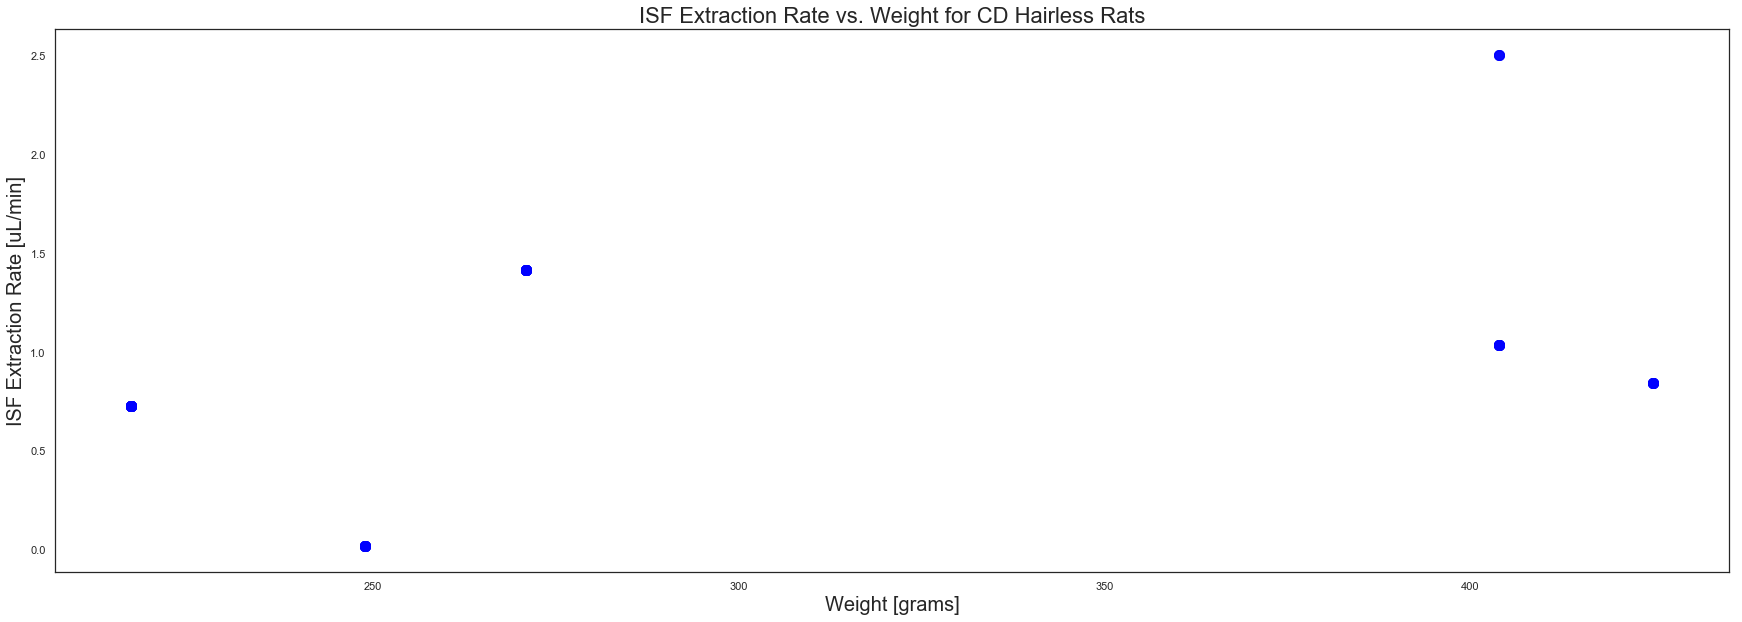

In [517]:
sns.set_style(style='white')
plt.figure(figsize=(30, 10))
plt.scatter(rat_df.Weight_gms, rat_df['ExtractionRate_uL/min'], s=100, alpha=0.5, color='blue')
plt.xlabel("Weight [grams]", fontsize = 20)
plt.ylabel("ISF Extraction Rate [uL/min]", fontsize = 20)
plt.title("ISF Extraction Rate vs. Weight for CD Hairless Rats", fontsize = 22)
plt.show()

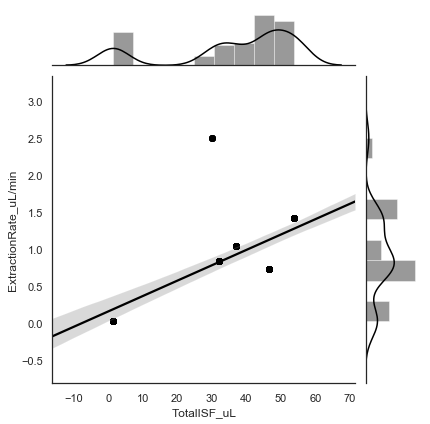

In [518]:
sns.jointplot(x=rat_df.TotalISF_uL, y=rat_df['ExtractionRate_uL/min'], kind="reg", color='black')

In [519]:
CD_df = rat_df[rat_df["Strain"]=="CD Hairless"]

In [520]:
CD_df.head()

,Species,Strain,ID,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Sex,...,HCO3- _mM,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat
0,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0
1,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN
4,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [521]:
SD_df = rat_df[rat_df["Strain"]=="Sprague Dawley"]

In [522]:
SD_df.head()

,Species,Strain,ID,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Sex,...,HCO3- _mM,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat
189,Rat,Sprague Dawley,190802,2,0,0,0,425.0,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Rat,Sprague Dawley,190802,2,0,0,0,425.0,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Rat,Sprague Dawley,190802,2,0,0,0,425.0,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Rat,Sprague Dawley,190802,2,0,0,0,425.0,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Rat,Sprague Dawley,190802,2,0,0,0,425.0,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [523]:
SD_df['ID'].value_counts()

190802    11
Name: ID, dtype: int64

In [524]:
CD_Control_df = CD_df[CD_df["Hydration"]==0]

In [525]:
CD_Control_df = CD_Control_df[CD_Control_df["Fasted"]==0]

In [526]:
CD_Control_df = CD_Control_df[CD_Control_df["STZ Injected"]==0]

In [527]:
CD_Control_df.head()

,Species,Strain,ID,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Sex,...,HCO3- _mM,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat
0,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0
1,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN
4,Rat,CD Hairless,A1_38555,0,0,0,0,217.0,5.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [528]:
CD_Control_df['ID'].value_counts()

A1_38555    27
A2_33134    24
A3_38555    24
190807      17
180626_3    16
180628      12
180807_G     6
38556_C1     3
39624_S4     1
39624_S3     1
39624_S2     1
38788_B1     1
Name: ID, dtype: int64

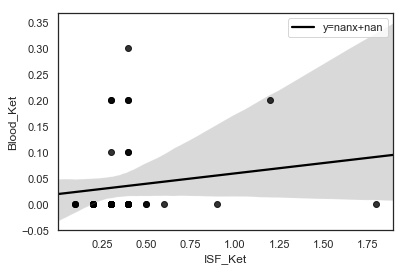

In [529]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(CD_Control_df['ISF_Ket'],CD_Control_df['Blood_Ket'])

ax = ax = sns.regplot(x="ISF_Ket", y="Blood_Ket", data=CD_Control_df, color='black', 
                  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

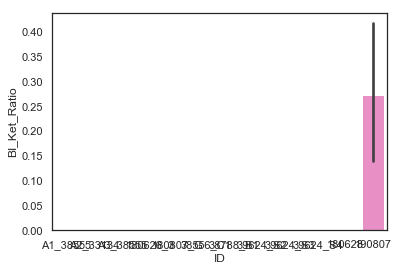

In [530]:
sns.set(style='white')
sns.barplot(x='ID', y='BI_Ket_Ratio', data=CD_Control_df)

In [531]:
CD_190807_df = CD_Control_df[CD_Control_df['ID']=='190807']

In [532]:
CD_190807_df.head()

,Species,Strain,ID,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Sex,...,HCO3- _mM,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat
200,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [533]:
CombinedKet_df = pd.concat([CD_190807_df, SD_df])

In [534]:
CombinedKet_df.head()

,Species,Strain,ID,Shaved,Fasted,Hydration,STZ Injected,Weight_gms,Age_wks,Sex,...,HCO3- _mM,O2Cap_mL/dL,O2Ct_mL/dL,P50_mm Hg,pO2/FlO2_mm Hg,nCa_mM,nMg_mM,Gap(K)_mM,nCa/nMg,BUN/Creat
200,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,Rat,CD Hairless,190807,0,0,0,0,404.0,44.0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [536]:
CombinedKet_df = CombinedKet_df.dropna(subset=['BI_Ket_Ratio'])

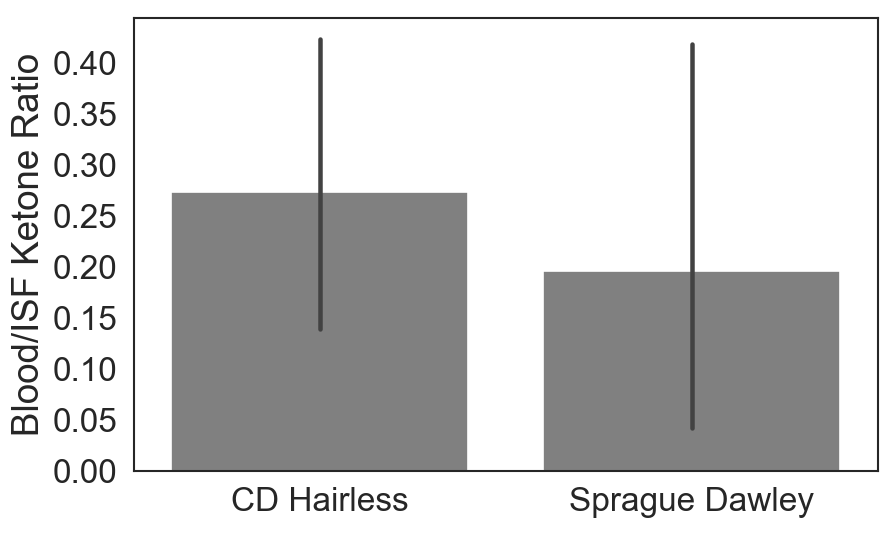

In [537]:
plt.figure(figsize=(8,5), dpi=120)
ax = sns.barplot(x='Strain', y='BI_Ket_Ratio', data=CombinedKet_df, color = 'gray')
ax.set_ylabel("Blood/ISF Ketone Ratio", fontsize = 22)
ax.set_xlabel(" ")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [538]:
CombinedKet_df[["ID", "BI_Ket_Ratio"]].groupby(["ID"], as_index=False).mean().sort_values(by="ID", ascending=False)

,ID,BI_Ket_Ratio
1,190807,0.272667
0,190802,0.195000


In [539]:
CombinedKet_df.groupby('ID')[['BI_Ket_Ratio']].std()

,BI_Ket_Ratio
ID,
190802,0.262964
190807,0.281310


In [540]:
CombinedKet_df.groupby('ID')[['BI_Ket_Ratio']].mean()

,BI_Ket_Ratio
ID,
190802,0.195000
190807,0.272667


In [541]:
CombinedKet_df[["ID", "BI_Ket_Ratio"]]

,ID,BI_Ket_Ratio
201,190807,0.33
202,190807,0.50
203,190807,0.50
205,190807,0.67
206,190807,0.25
207,190807,0.00
208,190807,0.25
209,190807,0.17
210,190807,0.75
211,190807,0.00


Note: We see above that n=15 for the CD and n=6 for the SD